In [1]:
!pip install torch torchvision

  Using cached torchvision-0.16.2-cp310-cp310-win_amd64.whl (1.1 MB)


In [2]:
!pip install pillow

In [3]:
!pip install pytesseract


In [4]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image, ImageDraw
from IPython.display import display
import pytesseract

In [5]:
# Set the path to the Tesseract executable in Windows
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [6]:
# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

C:\Users\NMESOMA\AppData\Local\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\NMESOMA\AppData\Local\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to C:\Users\NMESOMA/.cache\torch\hub\checkpoints\maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:38<00:00, 4.57MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [7]:
# Define a transformation to preprocess the image
transform = transforms.Compose([transforms.ToTensor()])


In [23]:
# Load and preprocess the image
image_path = r"C:\Users\NMESOMA\Pictures\images\Handwriting-test-dataset-for-OCR-operation.jpg" 
image= Image.open(image_path).convert('RGB')
input_image = transform(image).unsqueeze(0)


In [24]:
# Make a prediction
with torch.no_grad():
    prediction = model(input_image)

In [25]:
# Extract bounding boxes from the prediction
boxes = prediction[0]['boxes'].cpu().numpy()


In [26]:
# Create a copy of the original image for visualization
draw_image = image.copy()
draw = ImageDraw.Draw(draw_image)

In [27]:
# Visualize bounding boxes on the image
for box in boxes:
    box = [int(coord) for coord in box]
    draw.rectangle(box, outline="red", width=2)


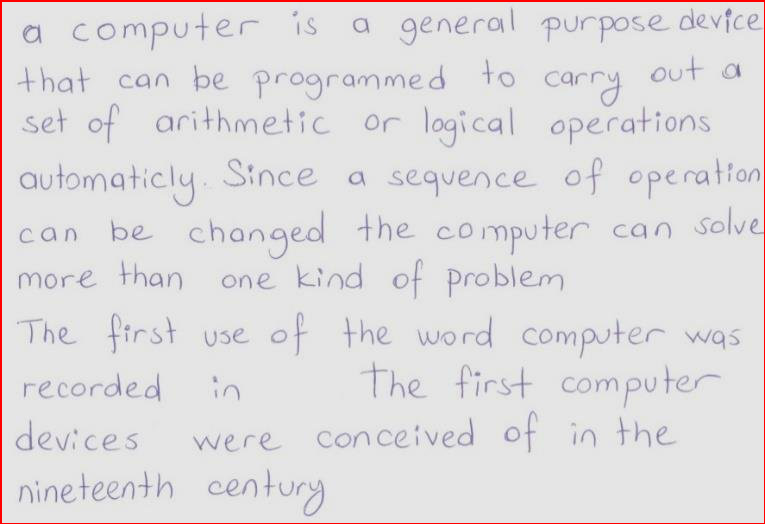

In [28]:
# Show the image with bounding boxes
display(draw_image)

In [29]:
# Extract and OCR the words within the bounding boxes
for box in boxes:
    box = [int(coord) for coord in box]
    cropped_image = image.crop(box)  # Crop the region containing the word
    text = pytesseract.image_to_string(cropped_image)  # Perform OCR on the cropped image
    print("Extracted Text:", text)

Extracted Text: a computer iS a general purpose device
that can be Programmed tq carry out a
set of arithmetic or logical operations
automaticly. Since a sequence of operation
can be changed the computer can solve
more than one kind of problem

The first use of the word computer was
recorded in The first com pu ter—
devices were conceived of in the
nineteenth century

Extracted Text: a computer iS a general purpose device
that can be Programmed tq carry out a
set of arithmetic or logical operations
automaticly. Since a sequence of operation
can be changed the computer can solve
more than one kind of problem

The first use of the word computer was
recorded in The first com pu ter—
devices were conceived of in the
nineteenth century

